# Sequence 2 Sequence model for mathematical sum using keras LSTM
There are different kinds of sequence - sequence models.

- One to One
- One to Many
- Many to One
- Many to Many

In our case, we use many to many.

In [1]:
# importing libraries

import tensorflow as tf
import numpy as np

import math
import random

In [2]:
def random_number_generator(n_examples: int, n_numbers: int, largest: int) -> tuple:
    """Function to generate random pair of numbers and their sum
    
    Args:
    - n_examples: number of examples to generate
    - n_numbers: number of numbers in the pair
    - largest: largest number in the pair
    
    Returns:
    - numbers: tuple of (list of numbers, sum of numbers)
    """
    x, y = list(), list()
    
    for _ in range(n_examples):
        numbers = [random.randint(1, largest) for _ in range(n_numbers)]
        numbers_sum = sum(numbers)
        x.append(numbers)
        y.append(numbers_sum)
        
    return x, y

In [3]:
n_examples = 2000
n_numbers = 2
largest = 20

x, y = random_number_generator(n_examples, n_numbers, largest)

In [4]:
x[:10]

[[7, 11],
 [18, 16],
 [4, 16],
 [16, 7],
 [15, 18],
 [13, 12],
 [14, 9],
 [20, 2],
 [8, 8],
 [14, 19]]

In [5]:
for i in range(10):
    print(f"The sum of {x[i][0]} and {x[i][1]} is {y[i]}")

The sum of 7 and 11 is 18
The sum of 18 and 16 is 34
The sum of 4 and 16 is 20
The sum of 16 and 7 is 23
The sum of 15 and 18 is 33
The sum of 13 and 12 is 25
The sum of 14 and 9 is 23
The sum of 20 and 2 is 22
The sum of 8 and 8 is 16
The sum of 14 and 19 is 33


In [6]:
'+'.join([str(num) for num in [1,2,3,4,5]])

'1+2+3+4+5'

In [7]:
max_len_in = n_numbers * (math.ceil(math.log10(largest + 1)) + n_numbers - 1)
max_len_out = math.ceil(math.log10(n_numbers * (largest + 1)))

max_len_in, max_len_out

(6, 2)

In [8]:
def convert_to_string(x_list: list, y_list: list, largest: int) -> tuple:
    """convert the list of numbers to string"""
    x_string = list()
    y_string = list()
    
    max_length_input = n_numbers * (math.ceil(math.log10(largest + 1)) + n_numbers - 1)
    
    for word in x_list:
        x_str = '+'.join([str(i) for i in word])
        x_strr = "".join([" " for _ in range (max_length_input - len(x_str))]) + x_str
        x_string.append(x_strr)
    
    max_length_output = math.ceil(math.log10(n_numbers * (largest + 1)))
    
    for word in y_list:
        y_str = str(word)
        y_strr = "".join([" " for _ in range(max_length_output - len(y_str))]) + y_str
        y_string.append(y_strr)
        
    return x_string, y_string


In [9]:
x_string, y_string = convert_to_string(x, y, largest)

In [10]:
print(x_string[:10])
print(y_string[:5])

['  7+11', ' 18+16', '  4+16', '  16+7', ' 15+18', ' 13+12', '  14+9', '  20+2', '   8+8', ' 14+19']
['18', '34', '20', '23', '33']


In [11]:
# integer encoding

alphabet = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "+", " "]

char_to_int = dict((c, i) for i, c in enumerate(alphabet))
        

In [12]:
char_to_int

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 '+': 10,
 ' ': 11}

In [13]:
def integer_encoding(x, y, alphabet):
    
    x_encode = list()
    for number in x:
        integer_encoded = [char_to_int[char] for char in number]
        x_encode.append(integer_encoded)
        
    y_encode = list()
    for number in y:
        integer_encoded = [char_to_int[char] for char in number]
        y_encode.append(integer_encoded)
    
    return x_encode, y_encode

In [14]:
x_encoded, y_encoded = integer_encoding(x_string, y_string, alphabet)
print(x_encoded[:10])
print(y_encoded[:10])

[[11, 11, 7, 10, 1, 1], [11, 1, 8, 10, 1, 6], [11, 11, 4, 10, 1, 6], [11, 11, 1, 6, 10, 7], [11, 1, 5, 10, 1, 8], [11, 1, 3, 10, 1, 2], [11, 11, 1, 4, 10, 9], [11, 11, 2, 0, 10, 2], [11, 11, 11, 8, 10, 8], [11, 1, 4, 10, 1, 9]]
[[1, 8], [3, 4], [2, 0], [2, 3], [3, 3], [2, 5], [2, 3], [2, 2], [1, 6], [3, 3]]


In [15]:
print(x_string[0])
print("is encoded to")
print(x_encoded[0])

  7+11
is encoded to
[11, 11, 7, 10, 1, 1]


In [16]:
def one_hot_encode(x, y, vocab_size):
    '''binary encode'''
    x_enc = list()
    
    # iterating through each pair
    for sequence in x:
        pattern = list()
        # iterating through each number in the pair
        for index in sequence:
            vector = [0 for _ in range(vocab_size)]
            vector[index] = 1
            pattern.append(vector)
        x_enc.append(pattern)
        
    y_enc = list()
    
    # iterating through label pair
    for sequence in y:
        pattern = list()
        for index in sequence:
            vector = [0 for _ in range(vocab_size)]
            vector[index] = 1
            pattern.append(vector)
        y_enc.append(pattern)
    
    return x_enc, y_enc

In [17]:
pattern = list()
for num_i in [3,4]:
    vector = [0 for _ in range(12)]
    vector[num_i] = 1
    pattern.append(vector)
    
pattern

[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]]

In [18]:
y_encoded_test = list()

for sequence in y_encoded:
    pattern = list()
    for number_i in sequence:
        vector = [0 for _ in range(12)]
        vector[number_i] = 1
        pattern.append(vector)
    y_encoded_test.append(pattern)

print(y_encoded_test[0])

[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]


In [19]:
x_onehot, y_onehot = one_hot_encode(x_encoded, y_encoded, len(alphabet))

In [20]:
y_onehot[0], y[0], y_encoded[0], y_string[0]

([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]],
 18,
 [1, 8],
 '18')

In [21]:
x_onehot[0], x[0], x_encoded[0], x_string[0]

([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 [7, 11],
 [11, 11, 7, 10, 1, 1],
 '  7+11')

In [22]:
print(x_encoded[0])
print(x_onehot[0])
print(f"The original number pair is {x_string[0]}")
print("and the label value for the pair")
print(y_encoded[0])
print(y_onehot[0])
print(f"The original label is {y_string[0]}")

[11, 11, 7, 10, 1, 1]
[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
The original number pair is   7+11
and the label value for the pair
[1, 8]
[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]
The original label is 18


In [23]:
x_onehot, y_onehot = np.array(x_onehot), np.array(y_onehot)

In [24]:
t = x_onehot.shape[1]
o = y_onehot.shape[1]
s = len(alphabet)

print(f"The length of input sequence is {t}")
print(f"The length of output sequence is {o}")
print(f"The vocabulary size is {s}")

The length of input sequence is 6
The length of output sequence is 2
The vocabulary size is 12


In [25]:
x[0], x_onehot[0]

([7, 11],
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

In [26]:
def to_character(seq, alphabet):
    i_to_c = dict((i, c) for i,c  in enumerate(alphabet))
    strings = list()
    
    for pattern in seq:
        string = i_to_c[np.argmax(pattern)] # get the index of max i.e position of 1
        
        strings.append(string)   
        
    return "".join(strings)


In [27]:
from tensorflow.keras.layers import Input, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.models import Model

i = Input(shape=(t,s))
x = LSTM(128)(i)
x = RepeatVector(2)(x) # the output of encoder lstm layer is 1dim whereas the decoder lstm layer requires 3dim so repeat vector repeats the input layer to match with the decoder layer lstm input
x = LSTM(64, return_sequences=True)(x)
x = TimeDistributed(Dense(s, activation="softmax"))(x) # dense layer can output one and in our example we need 2 outout vector sum of 20 + 20 = 40 so we use time distributed layer twice

model = Model(i, x)

In [28]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 6, 12)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │        72,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 2, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 2, 12)          │           780 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,380 (478.05 KB)

 Trainable params: 122,380 (478.05 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [30]:
model_history = model.fit(x_onehot, y_onehot, epochs=100, validation_split=0.2)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2351 - loss: 2.3782 - val_accuracy: 0.2587 - val_loss: 1.8931
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2551 - loss: 1.8379 - val_accuracy: 0.3100 - val_loss: 1.7090
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3200 - loss: 1.6691 - val_accuracy: 0.3375 - val_loss: 1.5908
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3465 - loss: 1.5723 - val_accuracy: 0.3638 - val_loss: 1.5382
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3899 - loss: 1.5112 - val_accuracy: 0.3738 - val_loss: 1.4738
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4225 - loss: 1.4532 - val_accuracy: 0.4075 - val_loss: 1.4532
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4445 - loss: 1.4366 - val_accuracy: 0.4288 - val_loss: 1.4327
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4784 - loss: 1.3851 - val_accuracy: 0.4950 - 

In [31]:
import matplotlib.pyplot as plt

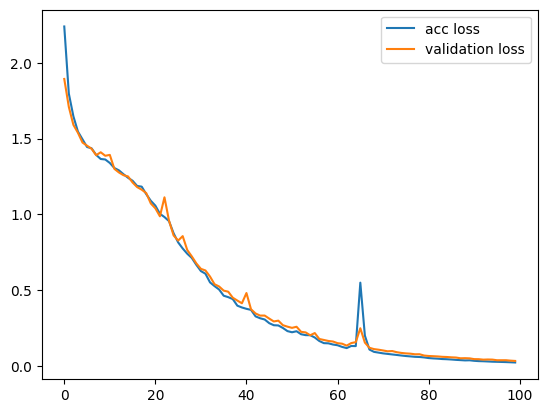

In [32]:
plt.plot(model_history.history["loss"], label="acc loss")
plt.plot(model_history.history["val_loss"], label="validation loss")
plt.legend()

Text(0.5, 1.0, 'Model accuracy')

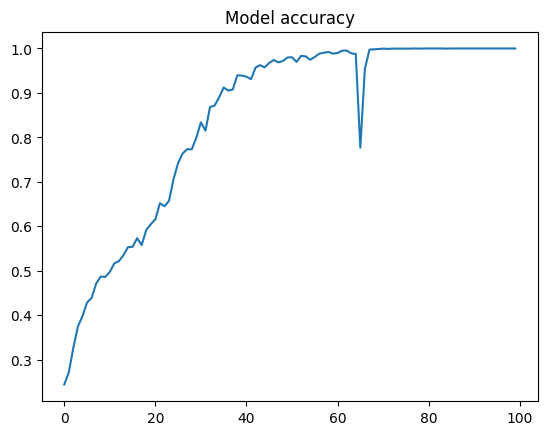

In [33]:
plt.plot(model_history.history["accuracy"])
plt.title("Model accuracy")

Text(0.5, 1.0, 'Model validation accuracy')

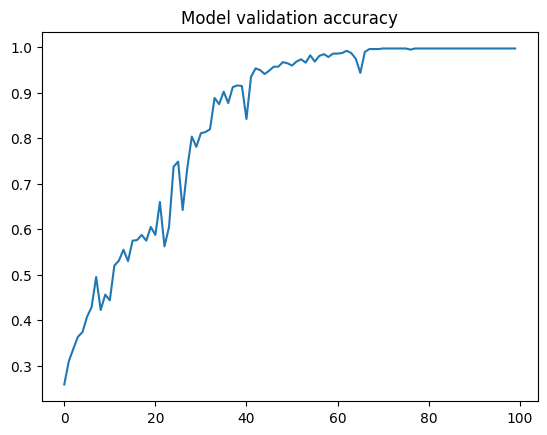

In [34]:
plt.plot(model_history.history["val_accuracy"])
plt.title("Model validation accuracy")

In [35]:
test_input = " 10+10"

In [36]:
input_encoded = integer_encoding([test_input], ["20"], alphabet)

In [37]:
input_onehot = one_hot_encode(input_encoded[0], input_encoded[1], 12)

In [38]:
input_onehot

([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]],
 [[[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]])

In [39]:
input_array_model = np.array(input_onehot[0])

In [40]:
input_array_model

array([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]])

In [41]:
logits = model.predict(input_array_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


In [42]:
logits

array([[[9.4815476e-07, 1.3770964e-02, 9.8613667e-01, 8.9865527e-05,
         1.4906130e-06, 1.7115259e-08, 1.5819811e-09, 2.1403206e-11,
         2.6209692e-12, 7.9768375e-10, 2.2252536e-08, 1.0440041e-08],
        [9.6079952e-01, 3.5187121e-02, 2.9282293e-03, 4.7440347e-04,
         1.5892294e-04, 1.5110243e-05, 6.7187662e-05, 2.4228792e-05,
         2.1031808e-06, 3.4080358e-04, 4.9309966e-07, 1.8246981e-06]]],
      dtype=float32)

In [43]:
predictions = logits.argmax(axis=2)

In [44]:
predictions

array([[2, 0]], dtype=int64)

In [45]:
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

int_to_char

{0: '0',
 1: '1',
 2: '2',
 3: '3',
 4: '4',
 5: '5',
 6: '6',
 7: '7',
 8: '8',
 9: '9',
 10: '+',
 11: ' '}

In [46]:
result = list()
for i in predictions[0]:
    result.append(int_to_char[i])
    
result = "".join(result)

In [47]:
result

'20'

In [62]:
num_a = 10
num_b = 20
sum_num = num_a + num_b

input_array = [num_a, num_b]
label_array = [sum_num]

input_array_string, label_array_string = convert_to_string([input_array], label_array, 20)

input_array_encoded, label_array_encoded = integer_encoding(input_array_string, label_array_string, alphabet)

In [64]:
input_array_encoded, label_array_encoded

([[11, 1, 0, 10, 2, 0]], [[3, 0]])

In [65]:
input_array_onehot = one_hot_encode(input_array_encoded, label_array_encoded, 12)

input_array_onehot

([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
   [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]],
 [[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
   [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]])

In [66]:
input_array_model = np.array(input_array_onehot[0])

In [69]:
input_array_model.shape

(1, 6, 12)

In [79]:
def predict_output(num_a, num_b):
    """function to predict"""
    if num_a > 20 or num_b > 20:
        print("cannot solve this sum.")
        return
    
    input_array = [num_a, num_b]
    label_array = [num_a + num_b]
    
    input_array_string, label_array_string = convert_to_string([input_array], label_array, 20)
    input_array_encoded, label_array_encoded = integer_encoding(input_array_string, label_array_string, alphabet)
    input_array_onehot = one_hot_encode(input_array_encoded, label_array_encoded, 12)
    
    input_array_model = np.array(input_array_onehot[0])
    
    logits = model.predict(input_array_model)
    
    predictions = logits.argmax(axis=2)
    
    result = list()
    
    int_to_char = dict((i, c) for i, c in enumerate(alphabet))
    
    for i in predictions[0]:
        character_predicted = int_to_char[i]
        result.append(character_predicted)
        
    answer = "".join(result)
    
    print(f"The sum of {num_a} and {num_b} is {answer}")

In [80]:
predict_output(10,10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The sum of 10 and 10 is 20


In [81]:
predict_output(1,2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
The sum of 1 and 2 is  3


In [82]:
predict_output(90,20)

cannot solve this sum.


In [83]:
predict_output(1,10)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
The sum of 1 and 10 is 11


In [86]:
predict_output(8,1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
The sum of 8 and 1 is  9
